Exercise 3.1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [1]:
from __future__ import print_function, division, absolute_import #python 2/3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

%matplotlib inline

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv("../../2013_movies.csv")

In [4]:
df["Ones"]=1

In [5]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00,1
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00,1
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00,1
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00,1
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00,1


In [6]:
X = df["Ones"]
y = df["DomesticTotalGross"]

In [7]:
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 12 Oct 2016   Prob (F-statistic):                nan
Time:                        10:56:12   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones        1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and adjusted R-squared are both 0. Therefore, the estimated percentage of the variance in our target variable Y that can be explained by our regression model is 0. This model is not predictive of the Domestic Total Gross.

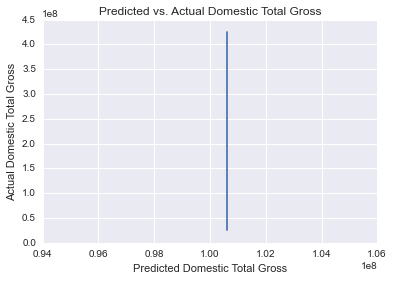

In [8]:
y_predicted = fit.predict(X)
plt.title('Predicted vs. Actual Domestic Total Gross')
plt.xlabel('Predicted Domestic Total Gross')
plt.ylabel('Actual Domestic Total Gross')
plt.plot(y_predicted, y)

(array([ 47.,  21.,  15.,   3.,   3.,   4.,   3.,   0.,   1.,   3.]),
 array([ -7.50286242e+07,  -3.51186446e+07,   4.79133498e+06,
          4.47013146e+07,   8.46112942e+07,   1.24521274e+08,
          1.64431253e+08,   2.04341233e+08,   2.44251213e+08,
          2.84161192e+08,   3.24071172e+08]),
 <a list of 10 Patch objects>)

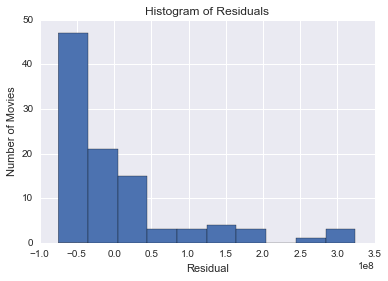

In [9]:
residuals = y - fit.predict(X)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(residuals)

The residuals are not normally distributed but skewed to the right.  If this model was a good predictor, the residuals would be normally distributed.

Exercise 3.2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [10]:
df2 = df.dropna()
df2=df2[["DomesticTotalGross", "Budget","Ones"]]

In [11]:
df2

,DomesticTotalGross,Budget,Ones
0,424668047,130000000.0,1
1,409013994,200000000.0,1
2,400738009,150000000.0,1
3,368061265,76000000.0,1
4,291045518,225000000.0,1
5,274092705,100000000.0,1
8,238679850,160000000.0,1
9,234911825,215000000.0,1
10,228778661,190000000.0,1
11,206362140,170000000.0,1


In [12]:
X = df2[["Ones", "Budget"]]
y = df2["DomesticTotalGross"]

In [13]:
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        10:56:13   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones        4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted R-squared is .274. Therefore, the estimated percentage of the variance in our target variable Y that can be explained by our regression model is 27.4%. This model is more predictive than the last model. 

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


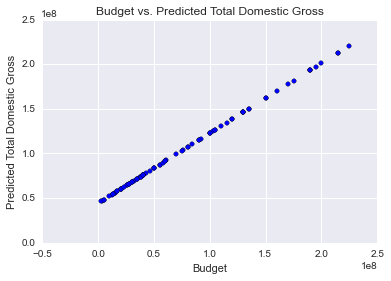

In [14]:
y_predicted = fit.predict(X)
plt.title('Budget vs. Predicted Total Domestic Gross')
plt.xlabel('Budget')
plt.ylabel('Predicted Total Domestic Gross')
plt.scat(df2["Budget"], y_predicted);

As budget increases, it is predicted that Total Domestic Gross will increase.

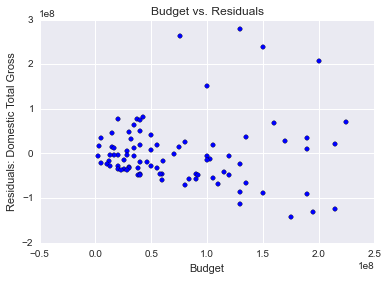

In [15]:
residuals = y - fit.predict(X)
plt.title('Budget vs. Residuals')
plt.xlabel('Budget')
plt.ylabel('Residuals: Domestic Total Gross')
plt.scatter(df2["Budget"], residuals);

The residuals increase as budget increases. There is heteroskedasticity. So, again, this model is not a great predictor.

Exercise 3.3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [16]:
df3 = df.dropna()
df3 = pd.concat([df3, pd.get_dummies(df3['Rating'])], axis=1)

In [17]:
df3

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1,0.0,1.0,0.0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1,0.0,1.0,0.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1,1.0,0.0,0.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1,1.0,0.0,0.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1,0.0,1.0,0.0
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00,1,0.0,1.0,0.0
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00,1,0.0,1.0,0.0
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00,1,1.0,0.0,0.0
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,5/16/13 0:00,1,0.0,1.0,0.0
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,11/8/13 0:00,1,0.0,1.0,0.0


In [18]:
X = df3[["Ones", "Budget", "PG", "PG-13", "R"]]
y = df3["DomesticTotalGross"]

In [19]:
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.25e-06
Time:                        10:56:14   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones        3.556e+07   1.13e+07      3.148      0.002      1.31e+07   5.8e+07
Budget         0.7806      0.156      5.005      0.000         0.470     1.091
PG          2.217e+07   1.68e+07      1.319      0.191     -1.13e+07  5.56e+07
PG-13       5.061e+06   1.25e+07      0.404      0.687     -1.98e+07     3e+07
R           8.329e+06   1.19e+07      0.701      0.485     -1.53e+07  3.19e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     7.22e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The adjusted R-squared is .261. Therefore, the estimated percentage of the variance in our target variable Y that can be explained by our regression model is 26.1%. This model is slightly less predictive when you look at the adjusted R-squared than the second model and more predictive than the first model.  The P values for PG, PG-13, and R are greater than .05, so I would likely not include these features in future models.  

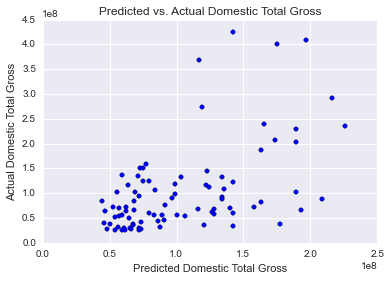

In [20]:
y_predicted = fit.predict(X)
plt.title('Predicted vs. Actual Domestic Total Gross')
plt.xlabel('Predicted Domestic Total Gross')
plt.ylabel('Actual Domestic Total Gross')
plt.scatter(y_predicted, y)

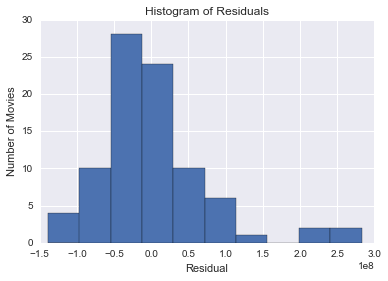

In [21]:
residuals = y - fit.predict(X)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(residuals);

The residual plot is much closer to a normal distribution in comparison to the first model's residual plot.  However, this residual plot is still skewed right. There are a few movies in which the model significantly underpredicted the Domestic Total Gross.

Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [22]:
df3

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1,0.0,1.0,0.0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1,0.0,1.0,0.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1,1.0,0.0,0.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1,1.0,0.0,0.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1,0.0,1.0,0.0
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00,1,0.0,1.0,0.0
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00,1,0.0,1.0,0.0
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00,1,1.0,0.0,0.0
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,5/16/13 0:00,1,0.0,1.0,0.0
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,11/8/13 0:00,1,0.0,1.0,0.0


In [23]:
X = df3[["Budget", "Runtime"]]
y = df3["DomesticTotalGross"]

In [24]:
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     100.8
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.70e-23
Time:                        10:56:15   Log-Likelihood:                -1699.6
No. Observations:                  87   AIC:                             3403.
Df Residuals:                      85   BIC:                             3408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.7377      0.143      5.164      0.000         0.454     1.022
Runtime     4.246e+05    1.2e+05      3.528      0.001      1.85e+05  6.64e+05
==============================================================================
Omnibus:                       38.987   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.387
Skew:                           1.592   Prob(JB):                     1.94e-21
Kurtosis:                       7.022   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted R-squared is .696. Therefore, the estimated percentage of the variance in our target variable Y that can be explained by our regression model is 69.6%. This model is a much better predictor of the Domestic Total Gross than previous models.

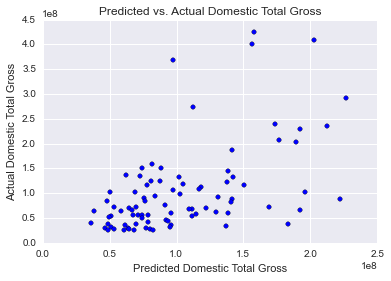

In [25]:
y_predicted = fit.predict(X)
plt.title('Predicted vs. Actual Domestic Total Gross')
plt.xlabel('Predicted Domestic Total Gross')
plt.ylabel('Actual Domestic Total Gross')
plt.scatter(y_predicted, y)

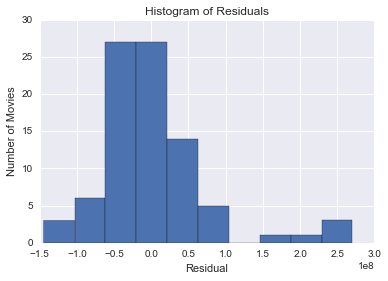

In [26]:
residuals = y - fit.predict(X)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(residuals);

The residual plot is close to a normal distribution in comparison to the first model's residual plot.  However, this residual plot is still skewed right. There are a few movies in which the model significantly underpredicted the Domestic Total Gross.

Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.1157141788665771

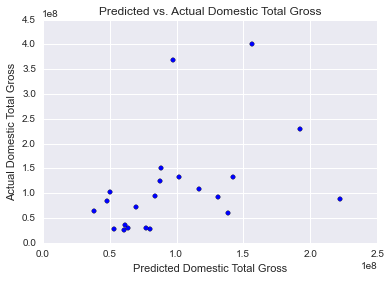

In [29]:
y_predicted = fit.predict(X_test)
plt.title('Predicted vs. Actual Domestic Total Gross')
plt.xlabel('Predicted Domestic Total Gross')
plt.ylabel('Actual Domestic Total Gross')
plt.scatter(y_predicted, y_test)

Splitting the data into train/test split and getting an R^2 of .12 reveals that this model was overfitting the training data, and this is not as good of a predictor as we might have original thought when testing and training on the same data.